In [1]:
import numpy as np
X = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])
y = np.array([[871], [1132], [1042], [1356], [1488], [1638], [1569], [1754], [1866], [1900]])

In [2]:
X


array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [3]:
y

array([[ 871],
       [1132],
       [1042],
       [1356],
       [1488],
       [1638],
       [1569],
       [1754],
       [1866],
       [1900]])

In [4]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [5]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [6]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

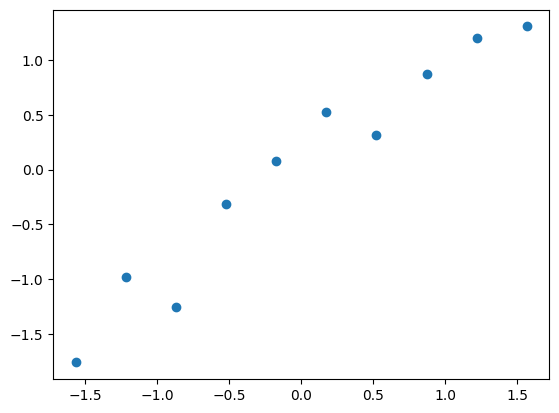

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

# Fórmula da regressão linear simples

y = b0 + b1 * x

In [11]:
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [13]:
import tensorflow as tf

In [15]:
b0 = tf.Variable(0.54)
b1 = tf.Variable(0.71)

In [22]:
def linear_regression(x):
    return b0 + b1 * x

In [31]:
def error(y_pred, y_true):
    return tf.reduce_mean(tf.pow(y_pred - y_true, 2))

In [32]:
optimizer = tf.optimizers.SGD(learning_rate=0.001)

In [33]:
for _ in range(1_000):
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = error(pred, y)

    gradients = g.gradient(loss, [b1, b0])

    optimizer.apply_gradients(zip(gradients, [b1, b0]))

In [35]:
b0, b1

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.07293497025966644>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.9359133839607239>)

<tf.Tensor: shape=(10, 1), dtype=float64, numpy=
array([[3.64126340e-02],
       [5.65074740e-02],
       [1.43085310e-01],
       [4.32582910e-02],
       [6.38266305e-02],
       [1.23100746e-01],
       [4.10588351e-02],
       [6.66853205e-08],
       [2.28662814e-04],
       [6.86958861e-02]])>

In [37]:
previsoes = b0 + b1 * X
previsoes

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-1.3933595 ],
       [-1.0675163 ],
       [-0.74167305],
       [-0.41582984],
       [-0.08998664],
       [ 0.23585658],
       [ 0.56169975],
       [ 0.887543  ],
       [ 1.2133863 ],
       [ 1.5392295 ]], dtype=float32)>

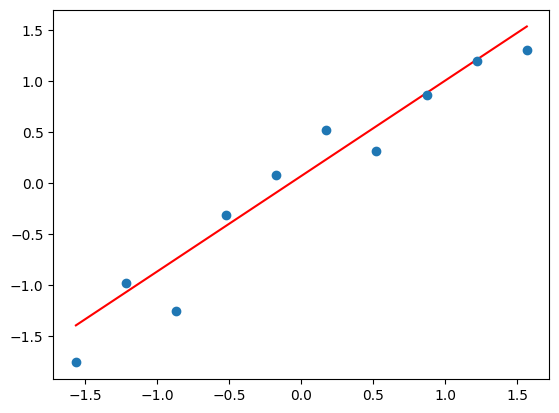

In [38]:
previsoes = previsoes.numpy()
plt.plot(X, previsoes, color='red')
plt.plot(X, y, 'o')

In [45]:
scaler_x.transform([[40]])

array([[-0.03481553]])

In [46]:
previsao = scaler_y.inverse_transform(b0 + b1 * scaler_x.transform([[40]]))
previsao

array([[1475.15950181]])

In [47]:
y1 = scaler_y.inverse_transform(y)

In [48]:
y1

array([[ 871.],
       [1132.],
       [1042.],
       [1356.],
       [1488.],
       [1638.],
       [1569.],
       [1754.],
       [1866.],
       [1900.]])

In [50]:
previsoes1 = scaler_y.inverse_transform(previsoes)
previsoes1


array([[ 993.37305],
       [1102.87   ],
       [1212.367  ],
       [1321.8638 ],
       [1431.3607 ],
       [1540.8577 ],
       [1650.3545 ],
       [1759.8514 ],
       [1869.3484 ],
       [1978.8453 ]], dtype=float32)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y1, previsoes1)
mse = mean_squared_error(y1, previsoes1)

In [52]:
mae, mse

(67.91875, 7153.913036322594)